In [36]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

df = pd.read_csv('water.csv',index_col=False)
del df['Unnamed: 0']

# Задание 1

In [66]:
df.location.head()

0    South
1    North
2    South
3    North
4    North
Name: location, dtype: object

In [ ]:
# Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

# Построить точечный график
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
# Построить модель линейной регрессии
# Рассчитать коэффициент детерминации
# Вывести график остатков

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

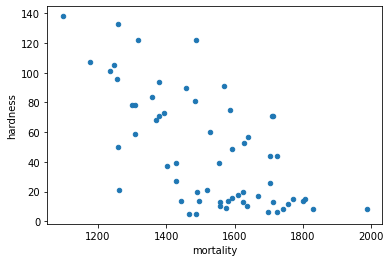

In [20]:
df.plot(kind='scatter', x='mortality', y='hardness')
# график говорит о том, что существует обратная зависимость смернтности от жесткости воды. Я предполагал что ситуация будет обратная.

In [16]:
# посмотрим в числовом выражении метода Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [18]:
#Так и есть, присутсвует средней силы обратная корреляция 
# Теперь Спирман
df[['mortality', 'hardness']].corr(method='spearman')
# Видим такой же результат

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


# Регрессия 


In [42]:
X = df[['hardness']]
y = df['mortality']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_

array([-3.13167087])

In [46]:
model.intercept_

1668.9722977277095

In [48]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [49]:
model.score(X_test, y_test)
#Коэфф детерминации 

0.5046490611017092

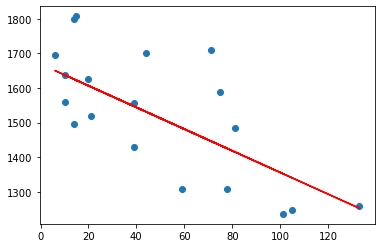

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
X_const = sm.add_constant(X_train) 

In [53]:
X_const.shape

(42, 2)

In [54]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           7.83e-06
Time:                        16:14:54   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [56]:
#Коэффициент детерминации небольшой, переменные слабо зависят друг от друга

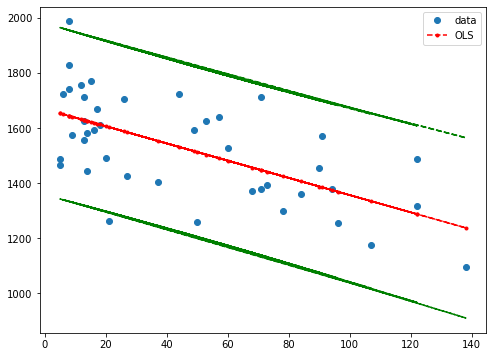

In [60]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

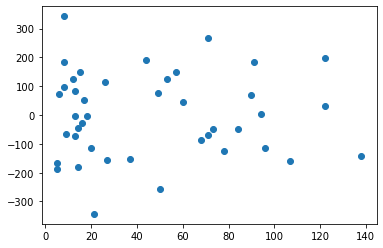

In [58]:
plt.scatter(X_const.iloc[:, 1], results.resid)


(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

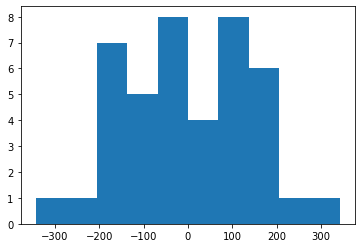

In [59]:
plt.hist(results.resid)
#Тренд отсутсвует, остатки распределены нормально 

#  Задание 2

In [95]:
df_grouped  = df.groupby(df.location == 'North')
north, south = df_grouped.get_group(True), df_grouped.get_group(False)
#разделим датафрейм

In [98]:
# посчитаем для севера
north[['mortality', 'hardness']].corr()
# можно сказать что корреляция отсутсвует 




,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

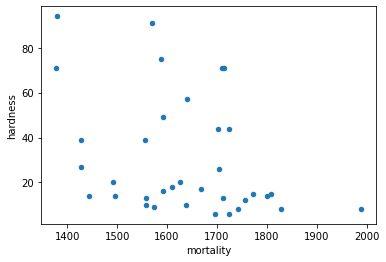

In [127]:
north.plot(kind='scatter', x='mortality', y='hardness')
# south.plot(kind='scatter', x='mortality', y='hardness')

In [97]:
X1 = north[['hardness']]
y1 = north['mortality']

In [196]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [197]:
model_north = LinearRegression()
model_north.fit(X1_train, y1_train)

LinearRegression()

In [198]:
model_north.coef_

array([-2.25038888])

In [199]:
model_north.intercept_

1694.905301402942

In [200]:
y1_pred = model_north.predict(X1_test)
y1_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [201]:
model_north.score(X1_test, y1_test)
#Коэфф детерминации очень маленький, что говорит о том, что данных очень мало, или в модели совсем нет смысла.

-0.18101539518829401

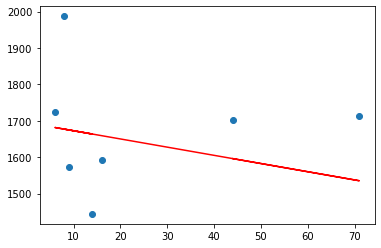

In [202]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r')

In [229]:
#Cделаем все то же для юга
south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   26 non-null     object
 1   town       26 non-null     object
 2   mortality  26 non-null     int64 
 3   hardness   26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


In [230]:
south[['mortality', 'hardness']].corr()
# теперь корреляция появилась

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [231]:
X2 = south[['hardness']]
y2 = south['mortality']

In [232]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [233]:
model_south = LinearRegression()
model_south.fit(X2_train, y2_train)

LinearRegression()

In [234]:
model_south.coef_

array([-3.07466127])

In [235]:
model_south.intercept_

1595.4337548999538

In [236]:
y2_pred = model_south.predict(X2_test)
y2_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [237]:
model_south.score(X2_test, y2_test)
#Предполагаю, что у модели очень мало значений, поэтому она показывает отрицательный коэффициент

-1.9300174406554644

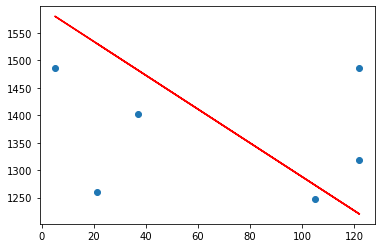

In [238]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')

In [239]:
X2_const = sm.add_constant(X2_train) 

In [240]:
X2_const.shape

(20, 2)

In [241]:
model_south_sm = sm.OLS(y2_train, X2_const)
results1 = model_south_sm.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     24.41
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           0.000106
Time:                        17:27:56   Log-Likelihood:                -119.64
No. Observations:                  20   AIC:                             243.3
Df Residuals:                      18   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.4338     49.134     32.471      0.0

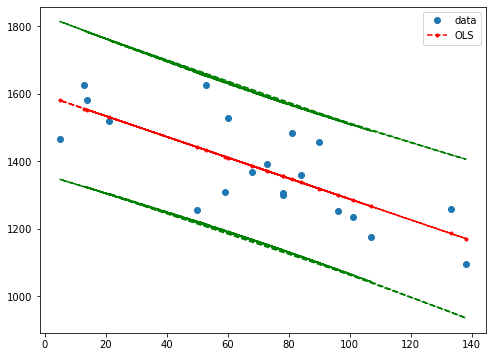

In [242]:
prstd, iv_l, iv_u = wls_prediction_std(results1) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X2_const.iloc[:, 1], y2_train, 'o', label="data")
ax.plot(X2_const.iloc[:, 1], results1.fittedvalues, 'r--.', label="OLS")
ax.plot(X2_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X2_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

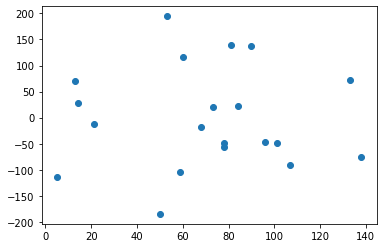

In [243]:
plt.scatter(X2_const.iloc[:, 1], results1.resid)

(array([1., 1., 3., 4., 2., 3., 2., 1., 2., 1.]),
 array([-184.70069149, -146.77829311, -108.85589473,  -70.93349635,
         -33.01109797,    4.91130041,   42.83369879,   80.75609717,
         118.67849555,  156.60089393,  194.52329231]),
 <BarContainer object of 10 artists>)

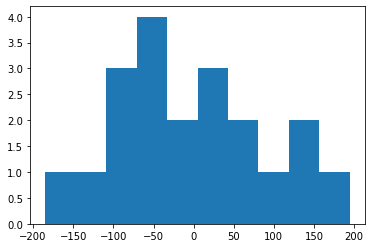

In [244]:
plt.hist(results1.resid)